# Template for creating new Notebooks!

## Step 1
### Load modules

In [2]:
# Add python modules
import numpy as np
import cv2
import matplotlib.pyplot as plt
from copy import deepcopy

# Add parent directory for custom modules
from sys import path as sysPath
sysPath.append('../')
sysPath.append('../Machine_Score/')

# Load custom modules that simr has loaded
import main_SIMR as simr
gm = simr.gm
im = simr.im
ic = simr.ic
ms = simr.ms
sa = simr.sa
dc = simr.ms.dc
mc = simr.ms.mc
fc = simr.ms.fc

simr.test()
gm.test()
im.test()
ic.test()
ms.test()
dc.test()
mc.test()
fc.test()
sa.test()

SIMR: Hi!  You're in Matthew's main program for all things galaxy collisions
GM: Hi!  You're in Matthew's module for generally useful functions and classes
IM: Hi!  You're in Matthew Ogden's information module for SPAM
IC: Hi!  You're in Matthew's main code for all things image creation.
MS: Hi!  You're in Matthew's SIMR module for all things machine scoring images
DC: Hi!  You're in direct_image_compare.py
MC: Hi!  You're in masked_image_compare.py
FC: Hi!  You're in feature_image_compare.py
SA: Hi!  You're in Matthew's Main program for score analysis!


In [5]:
tDir = '../targetDir'
tDir = gm.validPath(tDir)

tInfo = im.target_info_class( targetDir = tDir, printAll=False)
if tInfo.status == False:
    print("WARNING: target info class bad")
else:
    print("Target Good!")

# Get run info class
rInfo = tInfo.getRunInfo( rID='run_0000' )

if rInfo.status == False:
    print("WARNING")
else:
    print("Run '%s' Good!"%rInfo.get('run_id'))

Target Good!
Run 'run_0000' Good!


In [6]:
tParams = tInfo.getImageParams()
gm.pprint(tParams)

{'zoo_0': {'cmpArg': {'direct_compare_function': 'absolute_difference',
                      'targetName': 'zoo_0',
                      'targetType': 'target_image',
                      'type': 'direct_image_comparison'},
           'comment': 'Starting score '
                      'parameters file '
                      'for '
                      '587722984435351614',
           'imgArg': {'comment': 'Starting '
                                 'image '
                                 'parameters '
                                 'for '
                                 '587722984435351614',
                      'galaxy_centers': {'px': 513,
                                         'py': 514,
                                         'sx': 309,
                                         'sy': 608},
                      'image_size': {'height': 1024,
                                     'width': 1024},
                      'name': 'zoo_0'},
           'name': 'zoo_0',
       

## Score Parameters
    For each model, there are a variety of methods for scoring how well the model fits observation data.  The primary goal of this software suite is to find a fitness scoring method that matches.  
    Our primary method for getting this fitness score is by simulating the orbital parameters of the model in SPAM.  The simulation creates orbiting stars that get tidally displaced as the galaxies interact. 
    
    
### NOTE:  All code is assuming you have a group of possible score parameters. 

### Example JSON
```json
{
    "zoo_0": {
        "name": "zoo_0",
        "simArg": {
            "name": "100k",
            "nPts": "100k"
        },
        "imgArg": {
            "name": "zoo_0",
            "comment": "Starting image parameters for 1237678620102623480",
            "image_size": {
                "width": 1024,
                "height": 1024
            },
            "galaxy_centers": {
                "px": 512,
                "py": 512,
                "sx": 384,
                "sy": 796
            }
        },
        "scoreType": "model_fitness_score",
        "cmpArg": {
            "type": "direct_image_comparison",
            "targetType": "target_image",
            "targetName": "zoo_0",
            "direct_compare_function": "absolute_difference"
        },
        "comment": "Starting score parameters file for 1237678620102623480"
    }
}
```

In [15]:
personal_cores = [ 8 ]
personal_times_mpi = [ 850 ]
personal_times_smp = [ 885 ]



In [105]:

roughshod_cores     = [  32,  48, 64 ]
roughshod_smp_times = [ 561, 499, 473 ]
roughshod_mpi_times_0 = [ 340, 400, 462 ]
roughshod_mpi_times_1 = [ 502, 468 ]

babbage_cores = [  32,  64,  96, 128, 160, 192, 224, 256 ]
babbage_times = [ 142, 143, 134, 128, 128, 143, 179, 260 ]



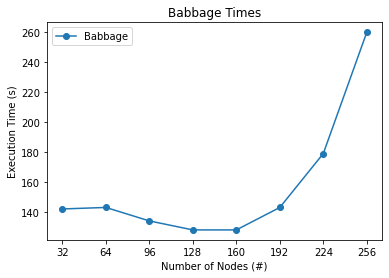

In [78]:
plt.plot( babbage_cores, babbage_times, 'o-',label='Babbage' )
plt.legend()
plt.xlabel("Number of Nodes (#)")
plt.ylabel("Execution Time (s)")
plt.title("Babbage Times")
tmp = plt.xticks(babbage_cores,babbage_cores)

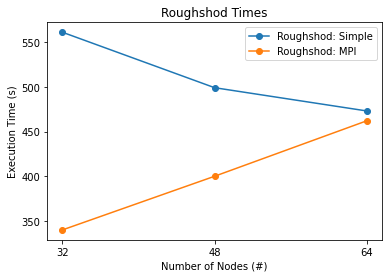

In [106]:

plt.plot( roughshod_cores, roughshod_smp_times, 'o-', label='Roughshod: Simple')
plt.plot( roughshod_cores, roughshod_mpi_times_0, 'o-', label='Roughshod: MPI')
plt.legend()
plt.xlabel("Number of Nodes (#)")
plt.ylabel("Execution Time (s)")
plt.title("Roughshod Times")
tmp = plt.xticks( roughshod_cores, roughshod_cores)

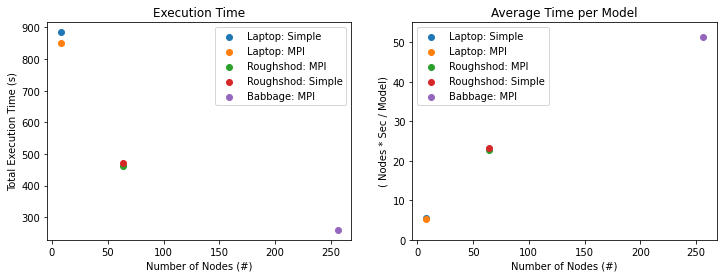

In [104]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].scatter( personal_cores, personal_times_smp, label="Laptop: Simple")
ax[0].scatter( personal_cores, personal_times_mpi, label="Laptop: MPI")
ax[0].scatter( roughshod_cores[2], roughshod_mpi_times[2], label="Roughshod: MPI")
ax[0].scatter( roughshod_cores[2], roughshod_smp_times[2], label="Roughshod: Simple")
ax[0].scatter( babbage_cores[-1], babbage_times[-1], label="Babbage: MPI")
ax[0].legend()
ax[0].set_title("Execution Time")
ax[0].set_ylabel("Total Execution Time (s)")
ax[0].set_xlabel("Number of Nodes (#)")


ax[1].scatter( personal_cores, personal_times_smp[0]* personal_cores[0] / 1300 , label="Laptop: Simple")
ax[1].scatter( personal_cores, personal_times_mpi[0] * personal_cores[0] /1300 , label="Laptop: MPI")
ax[1].scatter( roughshod_cores[2], roughshod_mpi_times[2]* roughshod_cores[2] /1300 , label="Roughshod: MPI")
ax[1].scatter( roughshod_cores[2], roughshod_smp_times[2] * roughshod_cores[2] /1300, label="Roughshod: Simple")
ax[1].scatter( babbage_cores[-1], babbage_times[-1]  * babbage_cores[-1] / 1300 , label="Babbage: MPI")
ax[1].set_title("Average Time per Model")
ax[1].set_ylabel("( Nodes * Sec / Model)")
ax[1].set_xlabel("Number of Nodes (#)")
ax[1].set_ylim([0,55])
ax[1].legend()